## Relevance Vector Machine

This notebook illustrates the application of the Relevance Vector Machine (RVM) [1] for performing machine learning tasks, specifically classification and regression. The RVM implementation used here is adapted from the Python-based algorithms available at https://github.com/ctgk/PRML, which are implementations derived from Bishop's textbook, *"Pattern Recognition and Machine Learning"*.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from prml.kernel import (
    RBF,
    RelevanceVectorRegressor,
    RelevanceVectorClassifier
)

np.random.seed(42)

/workspaces/ML_Basics/.venv/lib/python3.12/site-packages/prml-0.0.1-py3.12.egg/prml/markov/kalman.py:16: SyntaxWarning: invalid escape sequence '\i'
/workspaces/ML_Basics/.venv/lib/python3.12/site-packages/prml-0.0.1-py3.12.egg/prml/markov/kalman.py:16: SyntaxWarning: invalid escape sequence '\i'


### RVM for regression

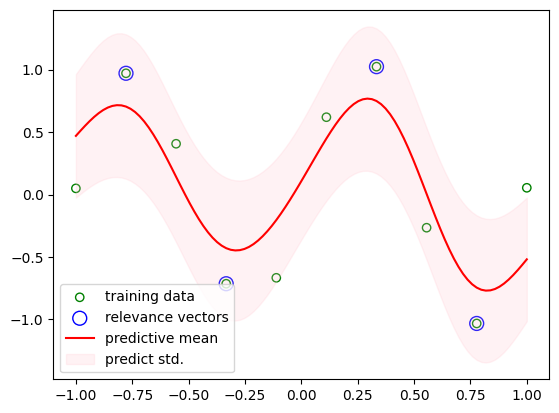

In [2]:
def toy_data(n=10):
    # Generate toy data
    x = np.linspace(-1, 1, n)
    y = np.sin(2 * np.pi * x) + 0.1 * np.random.randn(*x.shape)
    return x, y

x_train, y_train = toy_data(n=10)
x = np.linspace(-1, 1, 100)

# Relevance Vector Regressor with RBF kernel
model = RelevanceVectorRegressor(RBF(np.array([1., 20.])))
model.fit(x_train, y_train)

# predict
y, y_std = model.predict(x)


# plot training data
plt.scatter(x_train, y_train, facecolor="none", edgecolor="g", label='training data')
# plot relevance vectors
plt.scatter(model.x.ravel(), model.t, s=100, facecolor="none", edgecolor="b", label='relevance vectors')
# plot predictive mean
plt.plot(x, y, 'r-', label='predictive mean')
# plot tube of predictive std
plt.fill_between(x, y - y_std, y + y_std, color="pink", alpha=0.2, label="predict std.")
plt.legend(loc="best")
plt.show()

## RVM for classification

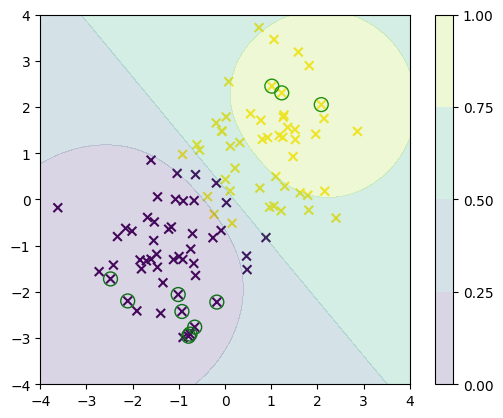

In [3]:
def create_toy_classification_data():
    # Generate toy classification data
    x0 = np.random.normal(size=100).reshape(-1, 2) - 1.
    x1 = np.random.normal(size=100).reshape(-1, 2) + 1.
    x = np.concatenate([x0, x1])
    y = np.concatenate([np.zeros(50), np.ones(50)]).astype(int)
    return x, y

x_train, y_train = create_toy_classification_data()
# Relevance Vector Classifier with RBF kernel
model = RelevanceVectorClassifier(RBF(np.array([1., 0.5, 0.5])))
model.fit(x_train, y_train)
# Creates a 2D coordinate grid for visualization purposes.
x0, x1 = np.meshgrid(np.linspace(-4, 4, 100), np.linspace(-4, 4, 100))
x = np.array([x0, x1]).reshape(2, -1).T
# Plot training data
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, s=40, marker='x', label='training data')
# Plot relevance vectors
plt.scatter(model.x[:, 0], model.x[:, 1], s=100, facecolor="none", edgecolor="g", label='relevance vectors')
# Draw decision boundary
plt.contourf(x0, x1, model.predict_proba(x).reshape(100, 100), np.linspace(0, 1, 5), alpha=0.2)
plt.colorbar()
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.gca().set_aspect("equal", adjustable="box")

[[1](https://proceedings.neurips.cc/paper_files/paper/1999/file/f3144cefe89a60d6a1afaf7859c5076b-Paper.pdf)] Tipping, M.E. (1999). The Relevance Vector Machine. Neural Information Processing Systems.